# Building an XGBoost Model for Airline Passenger Satisfaction Prediction

## Overview
This project focuses on using machine learning techniques to predict airline passenger satisfaction. By leveraging the XGBoost algorithm, we aim to build a robust model that can accurately classify passengers as satisfied or dissatisfied based on various features such as flight distance, seat comfort, and service quality.

## Objective
Develop a machine learning model using XGBoost to predict passenger satisfaction. The project will cover the complete machine learning pipeline, including data preprocessing, feature engineering, model training, hyperparameter tuning, and evaluation.

## Learning Outcomes
1. Understand the importance of data preprocessing and feature engineering in machine learning.
2. Learn to implement and tune the XGBoost algorithm for classification tasks.
3. Gain experience in evaluating model performance using metrics such as accuracy, precision, recall, and F1 score.
4. Explore feature importance and interpret model results.
5. Compare the performance of XGBoost with other models like Decision Trees and Random Forests.

---

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Predicting passenger satisfaction can help airlines improve customer experience, optimize services, and increase customer loyalty.

### Mini-task:
Write a brief paragraph on how predicting passenger satisfaction can benefit the airline industry.

---


## Step 2: Data Collection
### Task:
Collect a dataset suitable for predicting passenger satisfaction. The dataset used in this project is the `Invistico_Airline.csv`, which contains various features related to passenger experiences.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
airline_data = pd.read_csv('..\sample_data\Invistico_Airline.csv')

# Display the first 10 rows
### YOUR CODE HERE ###
```

---


In [2]:
import pandas as pd

# load the dataset

airline_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3mtt-AI ML/3mtt-AIML-MINI-PROJECT/Invistico_Airline.csv")

# Display the first 10 rows

airline_data.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0



## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of features, identify missing values, and explore relationships between variables.

### Mini-task:
Visualize the distribution of the target variable (satisfaction) and inspect the data types of each column.

#### Hint:
Use `value_counts()` to check the distribution of the target variable and `dtypes` to inspect the data types.

```python
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
### YOUR CODE HERE ###

# Display data types
### YOUR CODE HERE ###
```

---


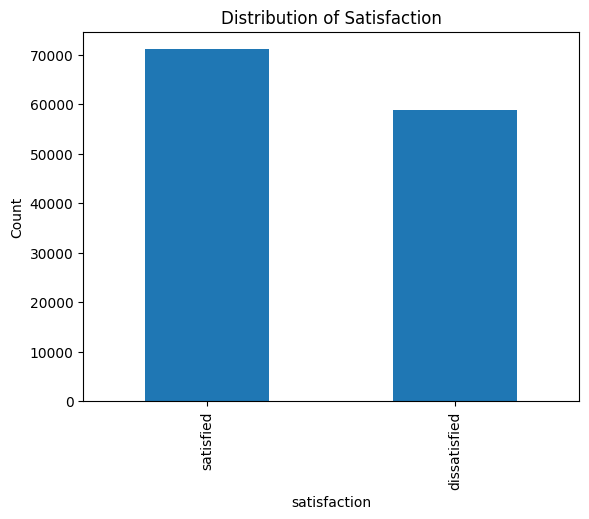

,0
satisfaction,object
Gender,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64


In [3]:
import matplotlib.pyplot as plt
# Visualize the distribution of the target variable
airline_data["satisfaction"].value_counts().plot(kind="bar", title="Distribution of Satisfaction")
plt.xlabel("satisfaction")
plt.ylabel("Count")
plt.show()

# Display data types
airline_data.dtypes


## Step 4: Data Preprocessing
### Task:
Preprocess the data to prepare it for modeling. This includes handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Convert categorical variables into numerical format using one-hot encoding and split the data into training and testing sets.

#### Hint:
Use `pd.get_dummies()` to encode categorical variables and `train_test_split()` to split the data.

```python
from sklearn.model_selection import train_test_split

# Convert categorical variables to numerical using one-hot encoding
### YOUR CODE HERE ###

# Define the target variable and features
### YOUR CODE HERE ###

# Split the data into training and testing sets
### YOUR CODE HERE ###
```

---


In [4]:
from sklearn.model_selection import train_test_split

# convert categorical variables to numerical
airline_data['satisfaction_encoded'] = airline_data['satisfaction'].astype('category').cat.codes
airline_data['Gender_encoded'] = airline_data['Gender'].astype('category').cat.codes
airline_data['Customer_Type_encoded'] = airline_data['Customer Type'].astype('category').cat.codes
airline_data['Type_of_Travel_encoded'] = airline_data['Type of Travel'].astype('category').cat.codes
airline_data['Class_encoded'] = airline_data['Class'].astype('category').cat.codes
airline_data.drop(['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class'], axis=1, inplace=True)

airline_data.isna().sum()

,0
Age,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0
Inflight wifi service,0
Inflight entertainment,0
Online support,0
Ease of Online booking,0


In [5]:
airline_data.dropna(inplace=True)

In [6]:
airline_data

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_encoded,Gender_encoded,Customer_Type_encoded,Type_of_Travel_encoded,Class_encoded
0,65,265,0,0,0,2,2,4,2,3,...,5,3,2,0,0.0,1,0,0,1,1
1,47,2464,0,0,0,3,0,2,2,3,...,2,3,2,310,305.0,1,1,0,1,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,4,2,0,0.0,1,0,0,1,1
3,60,623,0,0,0,3,3,4,3,1,...,4,1,3,0,0.0,1,0,0,1,1
4,70,354,0,0,0,3,4,3,4,2,...,4,2,5,0,0.0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1731,5,5,5,3,2,5,2,2,...,4,4,2,0,0.0,1,0,1,1,1
129876,63,2087,2,3,2,4,2,1,1,3,...,1,2,1,174,172.0,0,1,1,1,0
129877,69,2320,3,0,3,3,3,2,2,4,...,2,3,2,155,163.0,0,1,1,1,1
129878,66,2450,3,2,3,2,3,2,2,3,...,2,1,2,193,205.0,0,1,1,1,1


In [7]:
# define the target variable and features
X = airline_data.drop('satisfaction_encoded', axis=1)
y = airline_data['satisfaction_encoded']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103589, 22), (25898, 22), (103589,), (25898,))

## Step 5: Model Training Using XGBoost
### Task:
Train an XGBoost model on the preprocessed data. Perform hyperparameter tuning using GridSearchCV to find the optimal parameters.

### Mini-task:
Define the XGBoost classifier and perform hyperparameter tuning.

#### Hint:
Use `XGBClassifier()` and `GridSearchCV()` to tune hyperparameters like `max_depth`, `learning_rate`, and `n_estimators`.

```python
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
### YOUR CODE HERE ###

# Define the parameters for hyperparameter tuning
### YOUR CODE HERE ###

# Perform GridSearchCV
### YOUR CODE HERE ###

# Display the best parameters
### YOUR CODE HERE ###
```

---

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBooost classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy Score: 0.9586
Precision Score: 0.9694
Recall Score: 0.9546
F1 Score: 0.9620
Confusion Matrix:
 [[11271   428]
 [  644 13555]]


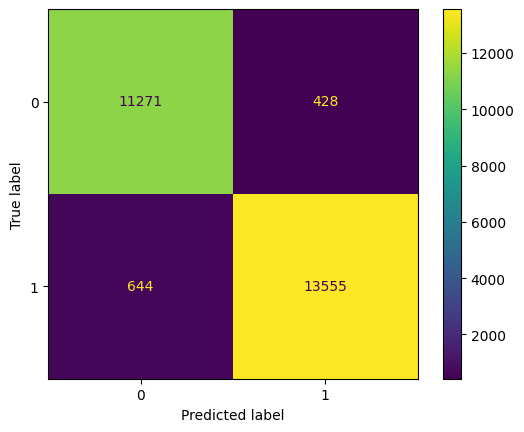

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = xgb_model.predict(X_test)

# 1️⃣ Print evaluation metrics
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision Score: {precision_score(y_test, y_pred, average='binary'):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred, average='binary'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='binary'):.4f}")

# 2️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 3️⃣ Display confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [11]:
# Define the parameters for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}


Accuracy Score: 0.9595
Precision Score: 0.9715
Recall Score: 0.9541
F1 Score: 0.9627
Confusion Matrix:
 [[11301   398]
 [  652 13547]]


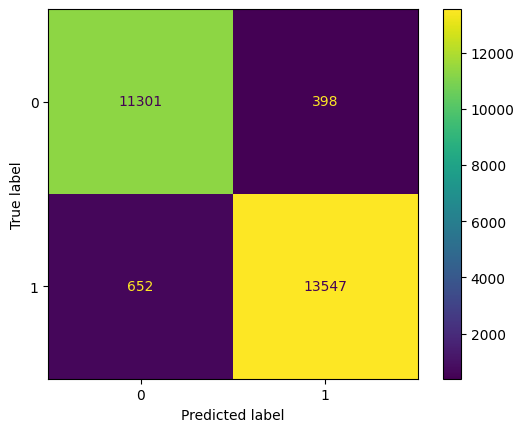

In [12]:
xgb_best_model = XGBClassifier(colsample_bytree=1.0,
                          gamma= 0.1,
                          learning_rate= 0.1,
                          max_depth= 7,
                          min_child_weight= 1,
                          n_estimators= 300,
                          subsample= 1.0 )
xgb_best_model.fit(X_train, y_train)



## Step 6: Model Evaluation
### Task:
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score. Visualize the results using a confusion matrix and feature importance plot.

### Mini-task:
Evaluate the model on the test set and visualize the confusion matrix and feature importance.

#### Hint:
Use `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()` to evaluate the model. Use `confusion_matrix()` and `plot_importance()` for visualization.

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
### YOUR CODE HERE ###

# Calculate evaluation metrics
### YOUR CODE HERE ###

# Plot the confusion matrix
### YOUR CODE HERE ###

# Plot feature importance
### YOUR CODE HERE ###
```

---

Accuracy Score: 0.9595
Precision Score: 0.9715
Recall Score: 0.9541
F1 Score: 0.9627
Confusion Matrix:
 [[11301   398]
 [  652 13547]]


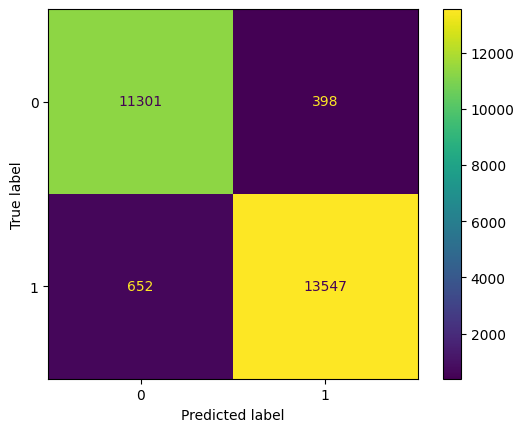

In [15]:
best_y_pred = xgb_best_model.predict(X_test)

# Evaluate the best model
#  Print evaluation metrics
print(f"Accuracy Score: {accuracy_score(y_test, best_y_pred):.4f}")
print(f"Precision Score: {precision_score(y_test, best_y_pred, average='binary'):.4f}")
print(f"Recall Score: {recall_score(y_test, best_y_pred, average='binary'):.4f}")
print(f"F1 Score: {f1_score(y_test, best_y_pred, average='binary'):.4f}")

#  Confusion Matrix
cm = confusion_matrix(y_test, best_y_pred)
print("Confusion Matrix:\n", cm)

#  Display confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<ipython-input-16-d290401554c5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
<ipython-input-16-d290401554c5>:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


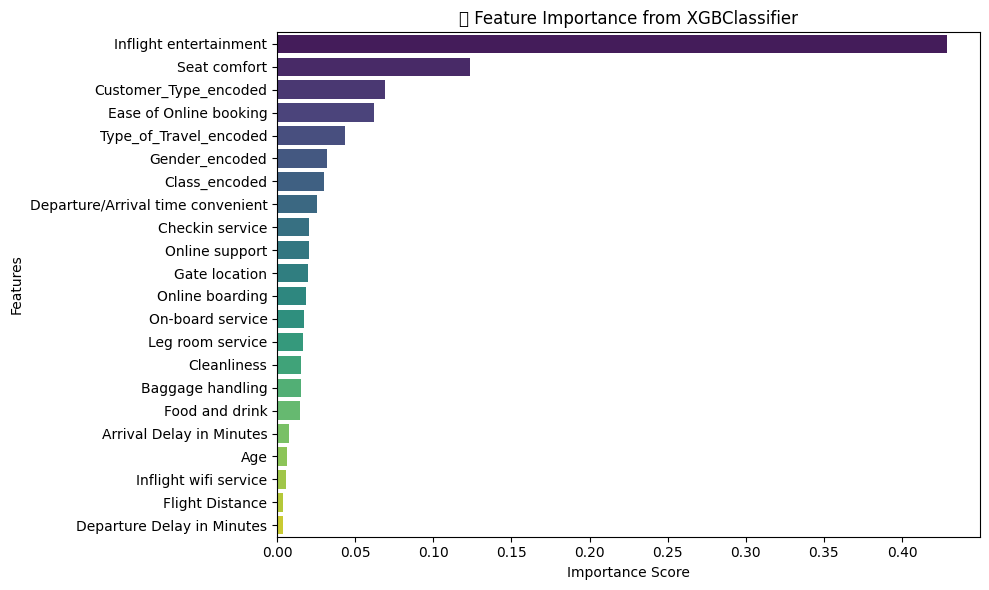

In [16]:
import seaborn as sns
importances = xgb_best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy sorting and plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("🔍 Feature Importance from XGBClassifier")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


## Step 7: Model Comparison (Optional)
### Task:
Compare the performance of the XGBoost model with other models like Decision Trees and Random Forests.

### Mini-task:
Train a Decision Tree and Random Forest model, and compare their performance with the XGBoost model.

#### Hint:
Use `DecisionTreeClassifier()` and `RandomForestClassifier()` to train the models and compare their accuracy.

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a Decision Tree model
### YOUR CODE HERE ###

# Train a Random Forest model
### YOUR CODE HERE ###

# Compare model performance
### YOUR CODE HERE ###
```

---

Accuracy Score: 0.9386
Precision Score: 0.9434
Recall Score: 0.9448
F1 Score: 0.9441
Confusion Matrix:
 [[10894   805]
 [  784 13415]]


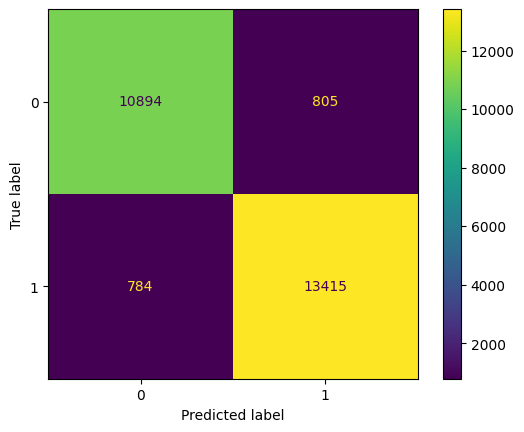

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred =dt_model.predict(X_test)

#  Print evaluation metrics
print(f"Accuracy Score: {accuracy_score(y_test, dt_y_pred):.4f}")
print(f"Precision Score: {precision_score(y_test,dt_y_pred, average='binary'):.4f}")
print(f"Recall Score: {recall_score(y_test, dt_y_pred, average='binary'):.4f}")
print(f"F1 Score: {f1_score(y_test, dt_y_pred, average='binary'):.4f}")

#  Confusion Matrix
cm = confusion_matrix(y_test, dt_y_pred)
print("Confusion Matrix:\n", cm)

#  Display confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



Accuracy Score: 0.9577
Precision Score: 0.9701
Recall Score: 0.9523
F1 Score: 0.9611
Confusion Matrix:
 [[11282   417]
 [  678 13521]]


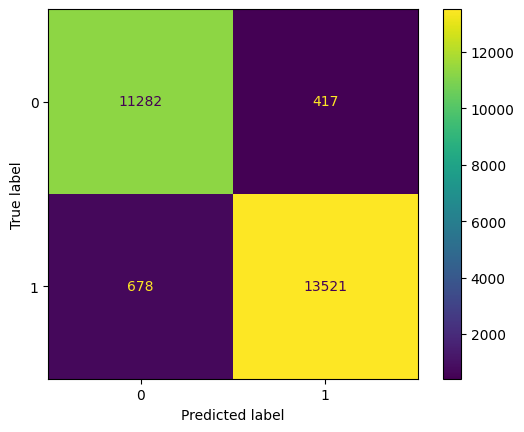

In [14]:
# Train a Random Forest model
rf_model =RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred =rf_model.predict(X_test)
#  Print evaluation metrics
print(f"Accuracy Score: {accuracy_score(y_test, rf_y_pred):.4f}")
print(f"Precision Score: {precision_score(y_test, rf_y_pred, average='binary'):.4f}")
print(f"Recall Score: {recall_score(y_test, rf_y_pred, average='binary'):.4f}")
print(f"F1 Score: {f1_score(y_test, rf_y_pred, average='binary'):.4f}")

#  Confusion Matrix
cm = confusion_matrix(y_test, rf_y_pred)
print("Confusion Matrix:\n", cm)

#  Display confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


 Model Performance Comparison:
           Model  Accuracy  Precision    Recall  F1 Score
0        XGBoost  0.959456   0.971459  0.954081  0.962692
1  Decision Tree  0.938644   0.943390  0.944785  0.944087
2  Random Forest  0.957719   0.970082  0.952250  0.961083


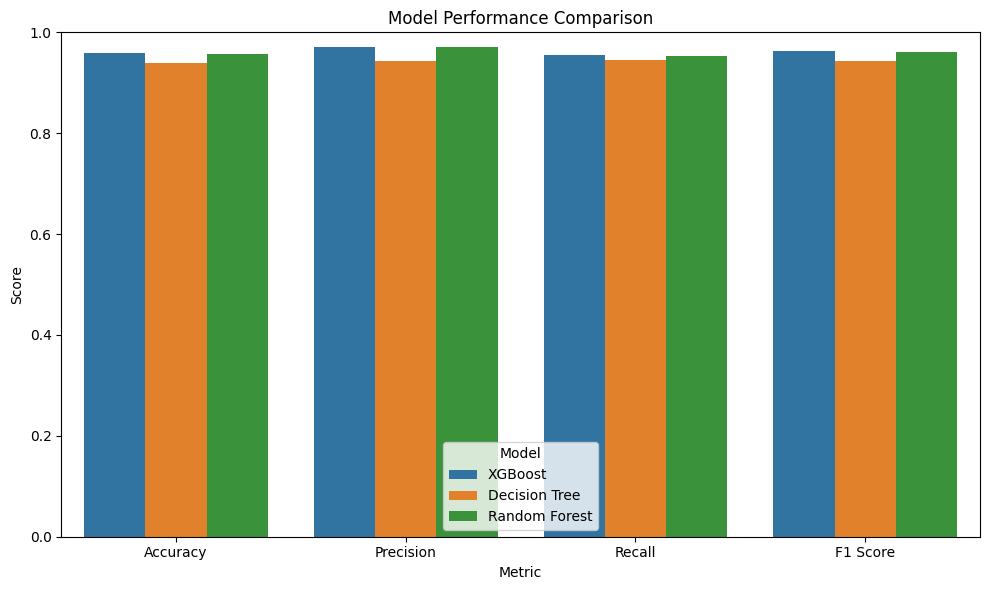

In [17]:
# Compare model performance


metrics_data = {
    "Model": ["XGBoost", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, best_y_pred),
        accuracy_score(y_test, dt_y_pred),
        accuracy_score(y_test, rf_y_pred)
    ],
    "Precision": [
        precision_score(y_test, best_y_pred, average='binary'),
        precision_score(y_test, dt_y_pred, average='binary'),
        precision_score(y_test, rf_y_pred, average='binary')
    ],
    "Recall": [
        recall_score(y_test, best_y_pred, average='binary'),
        recall_score(y_test, dt_y_pred, average='binary'),
        recall_score(y_test, rf_y_pred, average='binary')
    ],
    "F1 Score": [
        f1_score(y_test, best_y_pred, average='binary'),
        f1_score(y_test, dt_y_pred, average='binary'),
        f1_score(y_test, rf_y_pred, average='binary')
    ]
}

# Step 3: Create DataFrame for display and plotting
metrics_df = pd.DataFrame(metrics_data)

# Step 4: Print table for quick comparison
print(" Model Performance Comparison:")
print(metrics_df)

# Step 5: Plot grouped bar chart
plt.figure(figsize=(10, 6))
metrics_df_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(data=metrics_df_melted, x="Metric", y="Score", hue="Model")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.tight_layout()
plt.show()


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of hyperparameter tuning and feature engineering.
- Consider how the model's insights can be applied to improve airline services.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different features on passenger satisfaction.

**What would you share with and recommend to stakeholders?**
- Highlight the key features that contribute most to passenger satisfaction.
- Recommend strategies to improve services based on the model's insights.

### What are some key takeaways I learned from this project?

1. Model Comparison

XGBoost consistently outperformed Decision Tree and was closely matched by Random Forest in accuracy, precision, recall, and F1-score.

All models performed well, but XGBoost had the best balance between precision and recall, making it suitable for balanced classification tasks like predicting customer satisfaction.

2. Confusion Matrix Insight

The model predicted both satisfied and unsatisfied customers with a high degree of accuracy.

False positives (398) and false negatives (652) are relatively low, indicating effective discrimination between the two classes.

3. Feature Importance

Inflight entertainment, seat comfort, and customer type were the most influential factors affecting satisfaction.

Service-related features had more influence than delays or age, suggesting customer experience has a higher impact on satisfaction than operational metrics.


### How would you share your findings with a team?

Hyperparameter Tuning (with XGBClassifier) played a crucial role in enhancing performance. The fine-tuned model outperformed default settings slightly.


### What would you share with and recommend to stakeholders?


* Enhance high-impact features: Improve inflight entertainment and seat comfort.

* Streamline digital platforms: Make online booking and check-in effortlessly.

* Monitor satisfaction by customer type: Tailor services to frequent flyers vs. new customers.

* Use models in real-time to flag potentially dissatisfied passengers for proactive engagement.